In [13]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import csv
# Load the model
model = YOLO('GUNdetect.pt')


image_path = 'test.jpg'
video_path = 'test.mp4'


image 1/1 e:\GunDetection\export\test.jpg: 448x640 1 handgun, 152.8ms
Speed: 3.5ms preprocess, 152.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


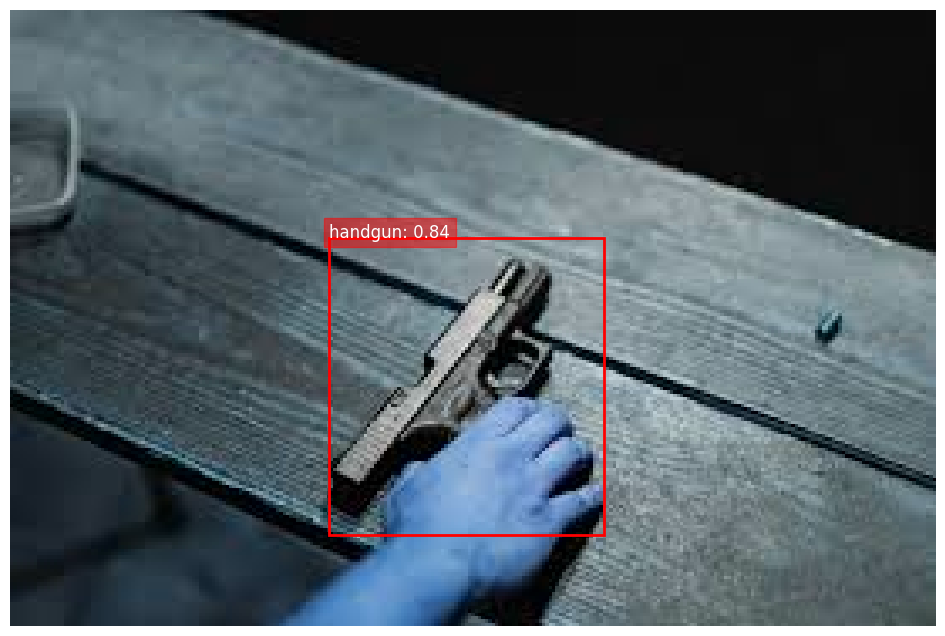

In [3]:
#input is image

results = model.predict(image_path, conf=0.2)
result = results[0]

image = result.orig_img
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.imshow(image)

# Draw  boxes
for box in result.boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    conf = box.conf[0]
    class_id = box.cls[0]
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
    label = f"{result.names[int(class_id)]}: {conf:.2f}"
    plt.text(x1, y1, label, color='white', fontsize=12, bbox=dict(facecolor='red', edgecolor='red', alpha=0.5))

plt.axis('off')
plt.show()


In [16]:
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
csv_file_name = f'detection_log.csv'

fps = cap.get(cv2.CAP_PROP_FPS)
#fps = 30

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp (seconds)', 'Class ID', 'Confidence'])

    frame_count = 0  # Initialize frame count
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, conf=0.5)
        result = results[0]
        
        image = result.orig_img

        # Calculate the timestamp in the video
        timestamp = frame_count / fps
        frame_count += 1
        print("time ",timestamp)
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            conf = box.conf[0]
            class_id = box.cls[0]
            if frame_count % fps == 0: #write csv every sec
                timesec = round(timestamp)
                writer.writerow([timesec, int(class_id), conf.item()])

            rect = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(255, 0, 0), thickness=2)
            label = f"{result.names[int(class_id)]}: {conf:.2f}"
            cv2.putText(image, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        cv2.imshow('Video', image)
        
        # Press 'q' to exit or wait until end video
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



0: 384x640 (no detections), 135.0ms
Speed: 4.0ms preprocess, 135.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.0

0: 384x640 1 handgun, 128.9ms
Speed: 3.3ms preprocess, 128.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.03333333333333333

0: 384x640 1 handgun, 139.4ms
Speed: 3.5ms preprocess, 139.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.06666666666666667

0: 384x640 1 handgun, 122.1ms
Speed: 3.5ms preprocess, 122.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.1

0: 384x640 1 handgun, 119.8ms
Speed: 2.0ms preprocess, 119.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.13333333333333333

0: 384x640 1 handgun, 122.7ms
Speed: 3.0ms preprocess, 122.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
time  0.16666666666666666

0: 384x640 1 handgun, 121.6ms
Speed: 4.0ms preprocess, 121.6ms inference, 1.0ms postprocess per

In [7]:
#use webcam

cap = cv2.VideoCapture(0)  # 0 is the default ID for the primary webcam

if not cap.isOpened():
    print("Error opening webcam")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.5)
    result = results[0]
    
    image = result.orig_img

    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        class_id = box.cls[0]
        rect = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(255, 0, 0), thickness=2)
        label = f"{result.names[int(class_id)]}: {conf:.2f}"
        cv2.putText(image, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow('Webcam', image)
    
    ###### Press 'q' to close webcam
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows()



0: 480x640 (no detections), 176.3ms
Speed: 3.8ms preprocess, 176.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 163.7ms
Speed: 3.4ms preprocess, 163.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 154.0ms
Speed: 2.0ms preprocess, 154.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 152.5ms
Speed: 3.1ms preprocess, 152.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 handgun, 154.3ms
Speed: 2.6ms preprocess, 154.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 173.5ms
Speed: 2.0ms preprocess, 173.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 148.9ms
Speed: 2.0ms preprocess, 148.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 148.5ms
Speed: 1.8ms preprocess,